In [4]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH="datasets/housing"
HOUSING_URL=DOWNLOAD_ROOT+HOUSING_PATH +"/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedir(housing.path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [6]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)
housing=load_housing_data()

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


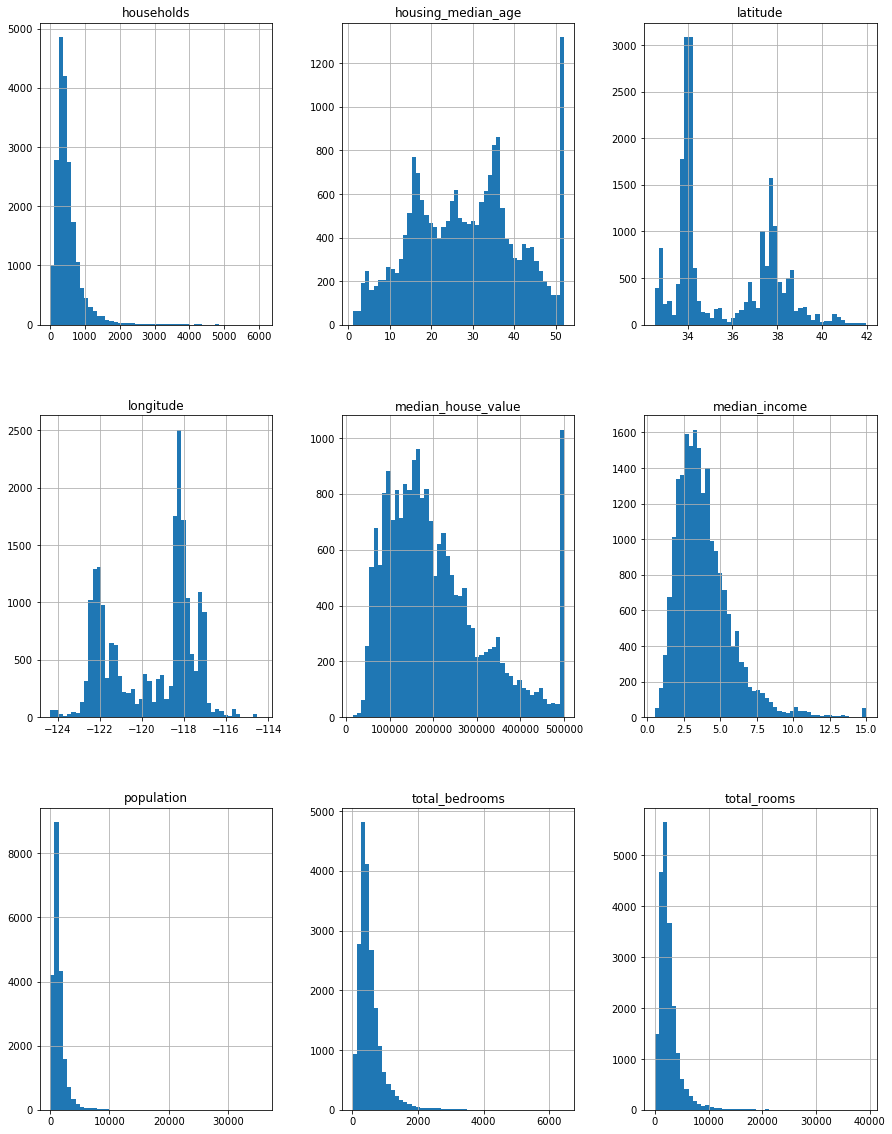

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(15,20))
plt.show()

In [22]:
import numpy as np

def split_train_set(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]


In [23]:
train_set,test_set=split_train_set(housing,0.2)

In [27]:
from zlib import crc32

def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*2**32
def split_train_test_by_id(data,test_ratio,id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [29]:
housing_with_id=housing.reset_index()
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,'index')

In [30]:
housing_with_id['id']=housing['longitude']*1000+housing['latitude']
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,'id')

In [31]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

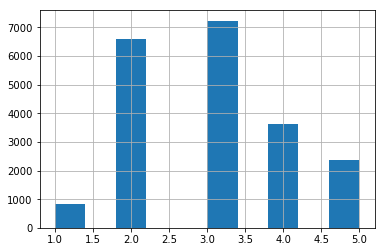

In [32]:
housing['income_cat']=np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace=True)
housing['income_cat'].hist()

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [34]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002549DD6AB38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000254A106D438>]], dtype=object)

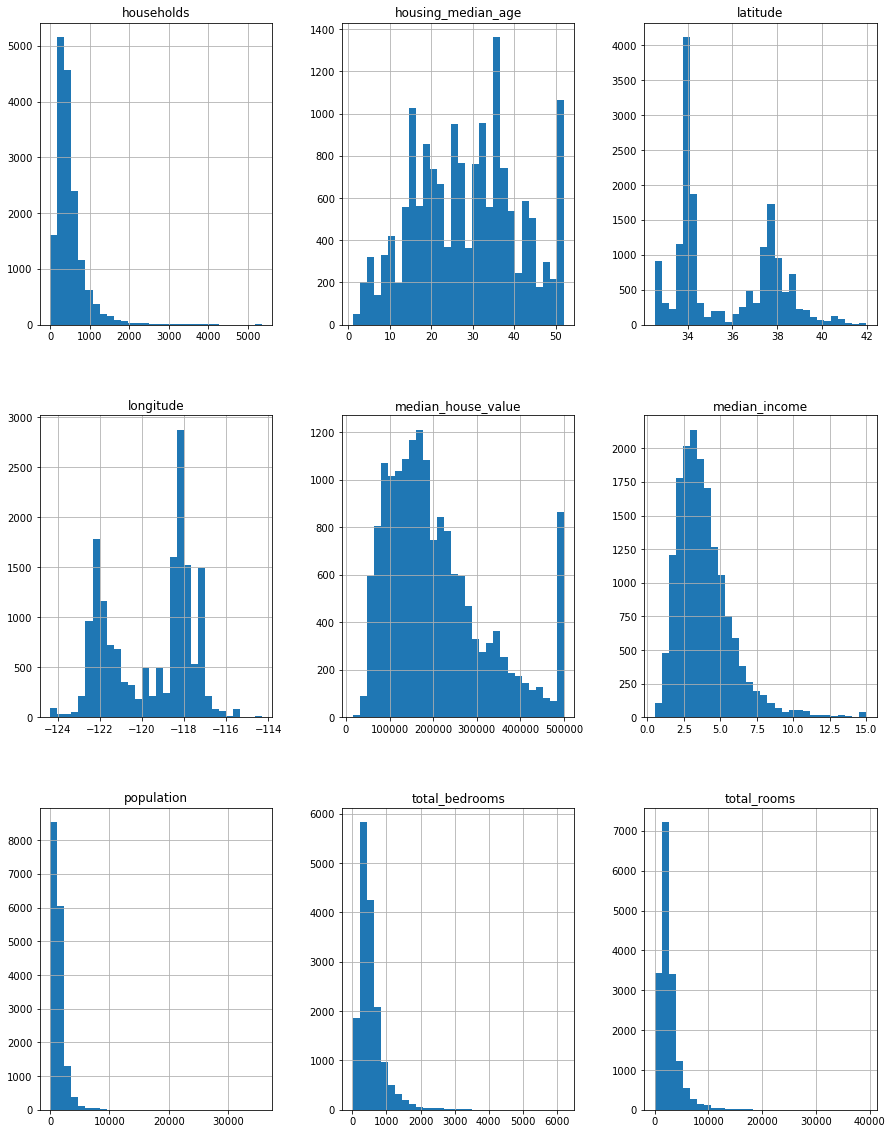

In [38]:
strat_train_set.hist(bins=30,figsize=(15,20))

In [39]:
housing=strat_train_set.copy()

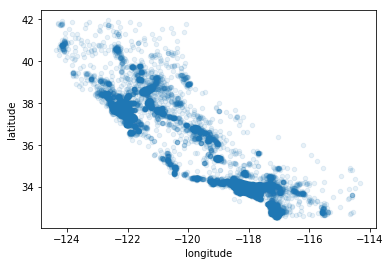

In [43]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

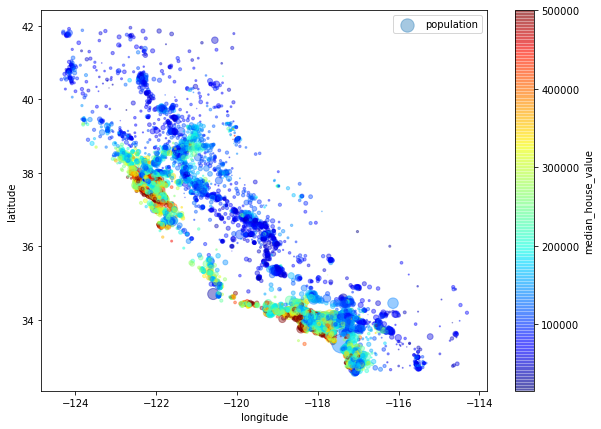

In [90]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
            s=housing['population']/100,label='population',figsize=(10,7),
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,sharex=False)
plt.legend()

In [94]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254A1D36B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000254A3A924A8>]], dtype=object)

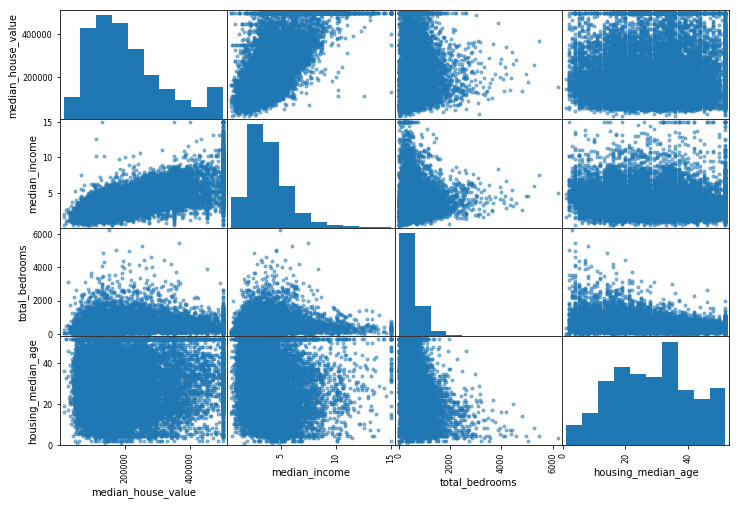

In [96]:
from pandas import scatter_matrix

attributes=['median_house_value','median_income','total_bedrooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

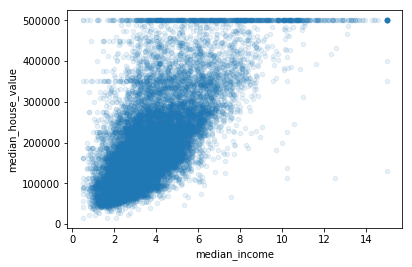

In [97]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

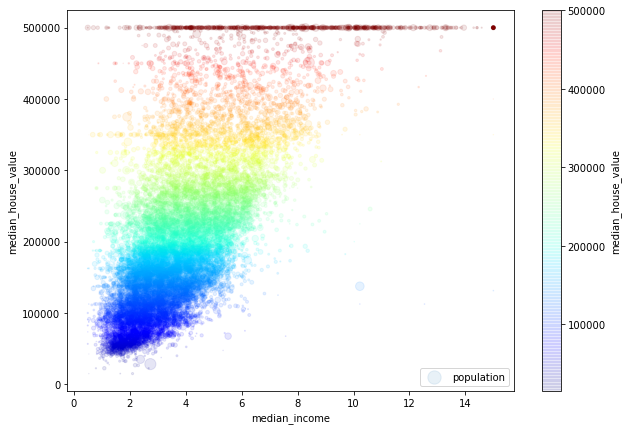

In [98]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,
            s=housing['population']/100,label='population',figsize=(10,7),
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,sharex=False)
plt.legend()

In [99]:
housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()

In [100]:
housing.dropna(subset=['total_bedrooms'])
housing.drop('total_bedrooms',axis=1)
median=housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace=True)

In [102]:
from sklearn.preprocessing import Imputer

imputer=Imputer(strategy='median')

In [103]:
housing_num=housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [105]:
imputer.statistics_
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [107]:
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns,
                       index=list(housing.index.values))
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [111]:
housing_cat=housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [112]:
housing_cat_encoded,housing_categories=housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [113]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [114]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [115]:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [128]:
pd.get_dummies(housing['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,1,0,0,0,0
18632,1,0,0,0,0
14650,0,0,0,0,1
3230,0,1,0,0,0
3555,1,0,0,0,0
19480,0,1,0,0,0
8879,1,0,0,0,0
13685,0,1,0,0,0
4937,1,0,0,0,0
4861,1,0,0,0,0


In [130]:
from data import CategoricalEncoder
cat_encoder=CategoricalEncoder(encoding='onehot-dense')
housing_cat_reshaped=housing_cat.values.reshape(-1,1)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [132]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

In [134]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ..., 
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([('imputer',Imputer(strategy='median')),
                        ('attribs_adder',CombinedAttributesAdder()),
                        ('std_scaler',StandardScaler()),])
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [143]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.attribute_names].values

In [146]:
num_attribs=list(housing_num)
cat_attribs=['ocean_proximity']

num_pipeline=Pipeline([('selector',DataFrameSelector(num_attribs)),
                       ('imputer',Imputer(strategy='median')),
                        ('attribs_adder',CombinedAttributesAdder()),
                        ('std_scaler',StandardScaler()),])

cat_pipeline=Pipeline([('selector',DataFrameSelector(cat_attribs)),
                       ('cat_encoder',CategoricalEncoder(encoding='onehot-dense')),])

In [147]:
from sklearn.pipeline import FeatureUnion

full_pipeline=FeatureUnion(transformer_list=[('num_pipeline',num_pipeline),
                                            ('cat_pipeline',cat_pipeline),])

In [148]:
housing_prepared=full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [150]:
housing_prepared.shape

(16512, 16)

In [152]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [153]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("예측: ",lin_reg.predict(some_data_prepared))

예측:  [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]


In [154]:
print("레이블: ",list(some_labels))

레이블:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [156]:
from sklearn.metrics import mean_squared_error
housing_prediction=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_prediction)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.198198489234

In [157]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [159]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [160]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(tree_reg,housing_prepared,housing_labels,
                      scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [161]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

display_scores(tree_rmse_scores)

Scores: [ 67907.34940836  67724.90794724  70540.08690186  70438.4211965
  71137.48137156  75157.8331158   71997.69432957  70143.54057902
  75941.86096403  69732.60698444]
Mean: 71072.1782798
Standard deviation: 2565.71974913


In [165]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,
                          scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean: 69052.4613635
Standard deviation: 2731.6740018


In [168]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [170]:
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,
                          scoring="neg_mean_squared_error",cv=10)
forest_rmse=np.sqrt(-forest_scores)
display_scores(forest_rmse)

Scores: [ 52420.39547741  50588.8768101   51889.46221574  55148.81420291
  51661.42572314  55824.4693268   51460.27362462  49744.03909761
  54607.93964331  52832.94655609]
Mean: 52617.8642678
Standard deviation: 1894.58965059


In [172]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]

forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [173]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [174]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [176]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

64105.5079996 {'max_features': 2, 'n_estimators': 3}
56353.1308494 {'max_features': 2, 'n_estimators': 10}
52854.0344262 {'max_features': 2, 'n_estimators': 30}
59751.2872791 {'max_features': 4, 'n_estimators': 3}
52624.8792832 {'max_features': 4, 'n_estimators': 10}
50243.8482908 {'max_features': 4, 'n_estimators': 30}
59704.2091997 {'max_features': 6, 'n_estimators': 3}
52217.8537428 {'max_features': 6, 'n_estimators': 10}
50223.1680615 {'max_features': 6, 'n_estimators': 30}
57559.860071 {'max_features': 8, 'n_estimators': 3}
52184.8335827 {'max_features': 8, 'n_estimators': 10}
50053.9213338 {'max_features': 8, 'n_estimators': 30}
62856.3617757 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54223.709937 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60810.2166245 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53076.003226 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58770.1411923 {'bootstrap': False, 'max_features': 4, 'n_estimato

In [177]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([  7.33878360e-02,   6.98619440e-02,   4.15711532e-02,
         1.48892343e-02,   1.48738328e-02,   1.42808373e-02,
         1.35410751e-02,   3.38521722e-01,   5.69574432e-02,
         1.13664668e-01,   6.86154597e-02,   9.12052503e-03,
         1.64474656e-01,   6.89674987e-05,   1.84383491e-03,
         4.32681032e-03])

In [184]:
final_model=grid_search.best_estimator_

X_test=strat_test_set.drop('median_house_value',axis=1)
Y_test=strat_test_set['median_house_value'].copy()

X_test_prepared=full_pipeline.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)

final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

47880.938360257256